# Problem3 – Practical Part 2

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer 

## Load Dataset and Data Summary

In [2]:
#Import dataset
df = pd.read_csv(r"D:\OneDrive - PUPR\Documents\KULIAH\MATH5836\practice\bank.csv")

In [3]:
#Check the 5-first data
df.head()

,age,marital,education,default,balance,housing,loan,contact,poutcome,y
0,35.0,married,tertiary,no,231.0,yes,no,unknown,unknown,no
1,50.0,married,secondary,no,49.0,yes,no,unknown,unknown,no
2,44.0,married,secondary,no,0.0,yes,no,unknown,unknown,no
3,55.0,divorced,secondary,no,0.0,no,no,unknown,unknown,no
4,42.0,single,secondary,no,-76.0,yes,no,unknown,unknown,no


In [4]:
#Check the summary of the data (numerical data)
df.describe()

,age,balance
count,7350.000000,7350.000000
mean,41.244525,1567.762958
std,12.174008,3429.972456
min,8.011643,-4681.332710
25%,32.000000,106.000000
50%,39.000000,569.000000
75%,49.000000,1808.000000
max,95.000000,81204.000000


### Check the unique values for each variables

In [5]:
df.nunique()

age           425
marital         4
education       4
default         3
balance      3407
housing         3
loan            3
contact         3
poutcome        4
y               3
dtype: int64

In [6]:
df['y'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [7]:
df['marital'].unique()

array(['married', 'divorced', 'single', 'unknown'], dtype=object)

In [8]:
df['balance'].unique()

array([ 231.       ,   49.       ,    0.       , ..., 1037.272121 ,
        334.7326607,  595.4455281], shape=(3407,))

In [9]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [10]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [12]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [14]:
df['age'].unique()

array([35.        , 50.        , 44.        , 55.        , 42.        ,
       53.        , 59.        , 56.        , 37.        , 40.        ,
       45.        , 38.        , 43.        , 49.        , 39.        ,
       30.        , 33.        , 48.        , 46.        , 24.        ,
       36.        , 51.        , 29.        , 52.        , 47.        ,
       31.        , 57.        , 32.        , 28.        , 27.        ,
       41.        , 25.        , 34.        , 26.        , 20.        ,
       23.        , 60.        , 54.        , 58.        , 22.        ,
       21.        , 61.        , 62.        , 76.        , 64.        ,
       69.        , 71.        , 80.        , 66.        , 67.        ,
       19.        , 78.        , 63.        , 70.        , 72.        ,
       68.        , 82.        , 83.        , 73.        , 74.        ,
       75.        , 86.        , 88.        , 65.        , 79.        ,
       85.        , 90.        , 77.        , 95.        , 18.  

## Data Prepocessing

### some of the features has missing values/unknown so we need drop them. 

In [15]:
#check the sahep of the dataset
df.shape

(7350, 10)

In [16]:
#replace unknown with numpy na values
col=['marital','education','housing','loan','contact','poutcome', 'y']
df[col]=df[col].replace('unknown', np.nan)

In [17]:
#Check the number of missing values/NA before droping them
df.isnull().sum()

age             0
marital        98
education     455
default         0
balance         0
housing       113
loan          122
contact      1611
poutcome     5333
y             115
dtype: int64

In [18]:
# Drop NA data
df = df.dropna(subset=col)

In [19]:
#Check the number of missing values/NA again after dropping them
df.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
poutcome     0
y            0
dtype: int64

In [20]:
# check the data shape
df.shape

(1710, 10)

### One- Hot Encoding Categorical features and Standardize the Numerical features

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols = ['marital', 'education', 'housing', 'loan', 'contact', 'poutcome']
num_cols = ['age', 'balance']  # numerical columns

# Define column transformer: OneHotEncode categoricals, scale numericals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

# Fit and transform the full DataFrame
X = preprocessor.fit_transform(df[cat_cols + num_cols])


In [22]:
# Get feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_features])

# Build DataFrame
X_df = pd.DataFrame(X.toarray() if hasattr(X, 'toarray') else X, columns=all_feature_names)


In [23]:
X_df.head()

,age,balance,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success
0,0.722228,0.292835,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.182633,1.018790,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.568058,-0.085153,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.799312,-0.045439,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.259718,-0.113047,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Outlier Check and its treatment

C:\Users\62853\AppData\Local\Temp\ipykernel_11512\3540189351.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X_df['age'], X_df['balance']], labels=['Age', 'Balance'])


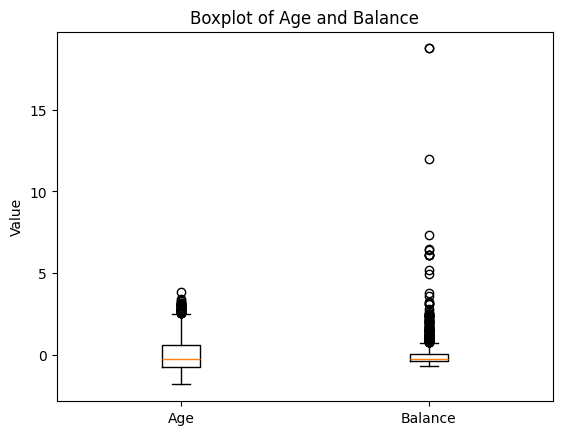

In [24]:
plt.boxplot([X_df['age'], X_df['balance']], labels=['Age', 'Balance'])
plt.title('Boxplot of Age and Balance')
plt.ylabel('Value')
plt.show()

In [25]:
#outlier treatment
cols=['age','balance']
for col in cols:
    Q1= X_df[col].quantile(0.25)
    Q3= X_df[col].quantile(0.75)
    IQR=Q3-Q1 

    lower_bound = Q1 - 1.5 *IQR 
    upper_bound = Q3 + 1.5*IQR

    X_df[col] = X_df[col].clip(lower= lower_bound, upper= upper_bound)

C:\Users\62853\AppData\Local\Temp\ipykernel_11512\3079649656.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X_df['age'], X_df['balance']], labels=['Age', 'Balance'])


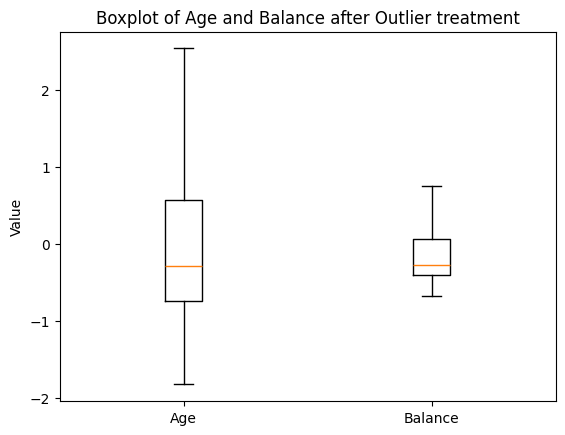

In [26]:
plt.boxplot([X_df['age'], X_df['balance']], labels=['Age', 'Balance'])
plt.title('Boxplot of Age and Balance after Outlier treatment')
plt.ylabel('Value')
plt.show()

In [27]:
X_df.head()

,age,balance,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success
0,0.722228,0.292835,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.182633,0.751196,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.568058,-0.085153,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.799312,-0.045439,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.259718,-0.113047,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# Get the Y categories with the name (0,1)
le_bank = LabelEncoder()
df['y'] = le_bank.fit_transform(df['y'])
print(le_bank.classes_)

['no' 'yes']


In [29]:
# Define X and y
X= X_df
y= df['y']

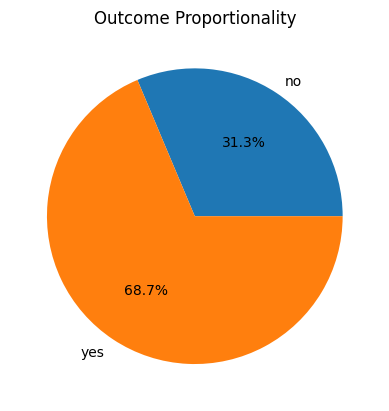

In [30]:
# Count the occurrences of each class
y_counts = df['y'].value_counts().sort_index()  # sort_index to align with class order

# Plot pie chart
plt.pie(y_counts,
        labels=le_bank.classes_,
        autopct='%.1f%%',
        shadow=False)
plt.title('Outcome Proportionality')
plt.show()

## Data Modelling (Naive Bayes vs Decision Tree)

In [31]:
#check X shape
X.shape

(1710, 11)

In [32]:
#check y shape
y.shape

(1710,)

In [33]:
# Data Splitting
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [34]:
# Define classifiers
classifiers_bank = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

Naive Bayes Accuracy on Test Set: 0.7632
Naive Bayes 5-Fold Cross-Validation Accuracy (on train set): 0.7259
              precision    recall  f1-score   support

          no       0.61      0.69      0.65       107
         yes       0.85      0.80      0.82       235

    accuracy                           0.76       342
   macro avg       0.73      0.74      0.73       342
weighted avg       0.77      0.76      0.77       342



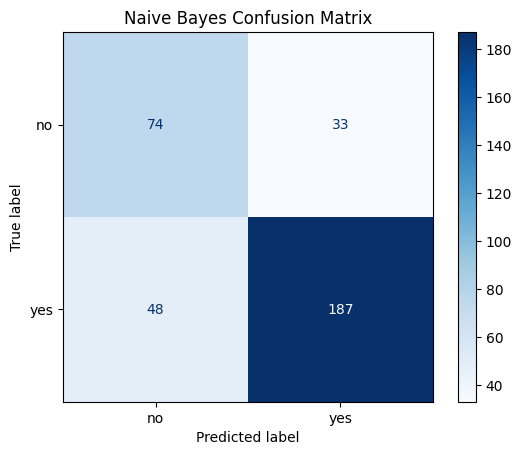

Decision Tree Accuracy on Test Set: 0.6520
Decision Tree 5-Fold Cross-Validation Accuracy (on train set): 0.6652
              precision    recall  f1-score   support

          no       0.45      0.46      0.45       107
         yes       0.75      0.74      0.75       235

    accuracy                           0.65       342
   macro avg       0.60      0.60      0.60       342
weighted avg       0.65      0.65      0.65       342



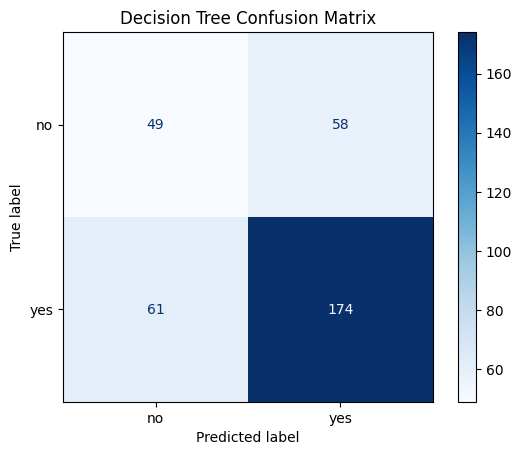

Best model on test set: Naive Bayes with accuracy: 0.7631578947368421
Best model by 5-fold CV: Naive Bayes with mean accuracy: 0.7258763134675543


In [35]:
from sklearn.model_selection import cross_val_score

acc_score = {}
cv_score = {}

for name, model in classifiers_bank.items():
    # Fit model on train
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score[name] = acc

    # Cross-validation on training data
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_score[name] = scores.mean()

    # Print results
    print(f"{name} Accuracy on Test Set: {acc:.4f}")
    print(f"{name} 5-Fold Cross-Validation Accuracy (on train set): {scores.mean():.4f}")
    print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

    # Confusion matrix
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        display_labels=['no', 'yes'],
        cmap='Blues'
    )
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Find best model by test accuracy
best_model = max(acc_score, key=acc_score.get)
print("Best model on test set:", best_model, "with accuracy:", acc_score[best_model])

# Find best model by CV score
best_cv_model = max(cv_score, key=cv_score.get)
print("Best model by 5-fold CV:", best_cv_model, "with mean accuracy:", cv_score[best_cv_model])


In [36]:
#Check Feature Importance (for Decision Tree)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

import pandas as pd
pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

balance                0.365114
age                    0.235271
poutcome_success       0.160881
housing_yes            0.091676
poutcome_other         0.035399
marital_married        0.023236
education_secondary    0.018755
marital_single         0.018754
contact_telephone      0.017083
loan_yes               0.016972
education_tertiary     0.016860
dtype: float64

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict
y_pred_ts = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

# Accuracy
acc_ts = accuracy_score(y_test, y_pred_ts)
acc_tr = accuracy_score(y_train, y_pred_tr)

# Output
print(f"Accuracy for Train: {acc_tr:.4f}")
print(f"Accuracy for Test: {acc_ts:.4f}")


Accuracy for Train: 0.7456
Accuracy for Test: 0.7632


## Conclussion: 
* Naive Bayes is better for this data modelling. 
* There's no overfitting because the train and test accuracy is very close